# Praktikum 3


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import data...

In [6]:
   
def import_data(separator):
    """ This function is when you put together several datasets,
    but each dataset always starts with a time of 0.
    Input: dataframe that also has a column 't'
    Output: continuous time over all datasets
   """
    def time_norm(data):
        a = list(data.iloc[:]['t'])
        b = list(data.iloc[:]['t'])
        
        for u in range(len(a)-1):
            if a[u]>a[u+1]:
                if b[u]>b[u+1]:
                    offset = a[u]-a[u+1]+1
                    a[u+1] = offset + a[u+1]
                    u += 1
                else:
                    a[u+1] = offset + a[u+1]
                    u += 1
                      
        output = pd.DataFrame({'emg': data.emg, 't': a})
        output.reset_index(inplace = True, drop = True)
        return output
    
    """import data and put weights in one variable and mvc in one variable"""
    column_names = [
      'emg',
      't',  
    ]
    # Creating an empty Dataframe with column names only
    weights_raw = pd.DataFrame(columns=column_names)
    mvc_raw = pd.DataFrame(columns=column_names)
    fatigue_raw = pd.DataFrame(columns=column_names)
    
    # read all mvc, weight, and fatigue files 
    for i in range(3):
        # create string for path
        weights_string = 'Weight' + str(i+1) + '.txt'
        mvc_string = 'MVC' + str(i+1) + '.txt'
        fatigue_string = 'Fatique' + str(i+1) + '.txt'
        
        weights_raw = pd.concat([weights_raw, pd.read_csv(
            weights_string,
             sep=separator, names=column_names, skiprows= 50,
             skipfooter = 50,
             engine='python'
            )], ignore_index=True)
        mvc_raw = pd.concat([mvc_raw, pd.read_csv(
            mvc_string,
             sep=separator, names=column_names, skiprows= 50, 
             skipfooter = 50,
             engine='python'
            )], ignore_index=True)
        fatigue_raw = pd.concat([fatigue_raw, pd.read_csv(
            fatigue_string,
             sep=separator, names=column_names, skiprows= 50, 
             skipfooter = 50,
             engine='python'
            )], ignore_index=True)
    # timing needs changing as, the appended data starts from 0 again
    weights = time_norm(weights_raw)
    mvc = time_norm(mvc_raw)
    fatigue = time_norm(fatigue_raw)
    return weights, mvc, fatigue

In [8]:
weights, mvc, fatigue = import_data('\t')

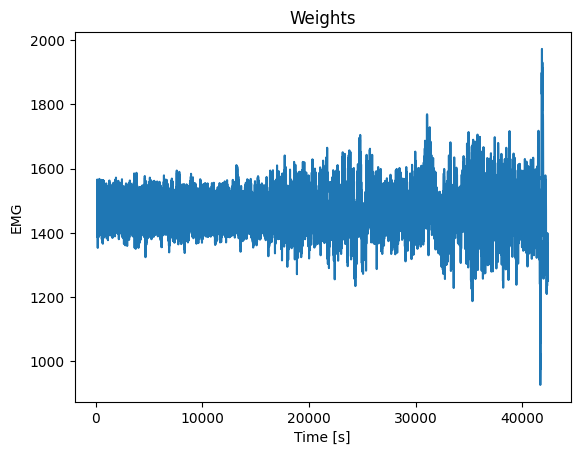

In [10]:
#plotte daten von MVC
plt.plot(mvc.t, mvc.emg)
plt.title('MVC')
plt.xlabel('time [s]')
plt.ylabel('emg')
plt.show()


2. gemittelte Daten von MVC berechnen und in ein csv datei abspeichern (ohne Berücksichtigung der 1. import data...)

In [9]:
def read_txt_file(filepath):
    return np.loadtxt(filepath)

def pad_data_to_max_length(*datasets):
    max_length = max(len(dataset) for dataset in datasets)
    padded_datasets = [
        np.pad(dataset, ((0, max_length - len(dataset)), (0, 0)), mode='constant', constant_values=0)
        for dataset in datasets
    ]
    return padded_datasets

def calculate_average_data(*datasets):
    return np.mean(datasets, axis=0)

def process_personal_data(filepaths, output_csv):
    # Daten einlesen
    datasets = [read_txt_file(filepath) for filepath in filepaths]
   
    # Daten auf gleiche Länge polstern
    padded_datasets = pad_data_to_max_length(*datasets)
    
    # Mittelwert berechnen
    average_data = calculate_average_data(*padded_datasets)
    
    # Ergebnis als DataFrame speichern
    average_df = pd.DataFrame(average_data, columns=['Value', 'Time'])
    average_df.to_csv(output_csv, index=False)
    print(f"Durchschnittsdaten gespeichert in: {output_csv}")

person1_files = ["MVC_1_Andreas.txt", "MVC_2_Andreas.txt", "MVC_3_Andreas.txt", "MVC_4_Andreas.txt"]
person2_files = ["MVC_1_Carina.txt", "MVC_2_Carina.txt", "MVC_3_Carina.txt", "MVC_4_Carina.txt"]
person3_files = ["MVC_1_Pauline.txt", "MVC_2_Pauline.txt", "MVC_3_Pauline.txt", "MVC_4_Pauline.txt"]

# Verarbeitung der Daten von Andreas
process_personal_data(person1_files, "average_MVC_Andreas.csv")

# Verarbeitung der Daten von Clara
process_personal_data(person2_files, "average_MVC_Carina.csv")

# Verarbeitung der Daten von Pauline
process_personal_data(person3_files, "average_MVC_Pauline.csv")


Durchschnittsdaten gespeichert in: average_MVC_Andreas.csv


FileNotFoundError: MVC_1_Carina.txt not found.

In [16]:
def get_bursts(mvc_emg_filtered, weights_emg_filtered, fatigue_emg_filtered):   
    def get_individual_burst(x):
        def tellme(s):
            print(s)
            plt.title(s, fontsize=16)
            plt.draw()
            
        plt.clf()
        plt.setp(plt.gca(), autoscale_on=True)
        plt.plot(x)
       
        tellme('Click once to start zoom')
        plt.waitforbuttonpress()
        
        while True:
            tellme('Select two corners of zoom, enter/return key to finish')
            pts = plt.ginput(2, timeout=-1)
            if len(pts) < 2:
                break
            (x0, y0), (x1, y1) = pts
            xmin, xmax = sorted([x0, x1])
            ymin, ymax = sorted([y0, y1])
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
          
            
        tellme('Choose start of activity')    
        s = plt.ginput(1)
        tellme('Choose end of activity')   
        e = plt.ginput(1)
        s1 = s[0]
        e1 = e[0]
        start = int(s1[0].astype(int))
        end = int(e1[0].astype(int))
        plt.show()
        
        return start,end
    number_bursts = 3
    mvc_start = np.empty(number_bursts)
    mvc_end = np.empty(number_bursts)
    weights_start = np.empty(number_bursts)
    weights_end = np.empty(number_bursts)
    fatigue_start = np.empty(number_bursts)
    fatigue_end = np.empty(number_bursts)
    for i in range(number_bursts):
        mvc_start[i], mvc_end[i] = get_individual_burst(mvc_emg_filtered)
    for i in range(number_bursts): 
        weights_start[i], weights_end[i] = get_individual_burst(weights_emg_filtered)
    for i in range(number_bursts): 
        fatigue_start[i], fatigue_end[i] = get_individual_burst(fatigue_emg_filtered)  
       
    mvc_start = mvc_start.astype(int)
    mvc_end = mvc_end.astype(int)
    weights_start = weights_start.astype(int)
    weights_end = weights_end.astype(int)
    fatigue_start = fatigue_start.astype(int)
    fatigue_end = fatigue_end.astype(int)
    
    
    return mvc_start, mvc_end, weights_start, weights_end, fatigue_start, fatigue_end